
## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
# File location and type
file_location = "/FileStore/tables/adult.csv"
file_type = "csv"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.csv(file_location, header = True, inferSchema = True)

In [0]:
type(df)

Out[42]: pyspark.sql.dataframe.DataFrame

In [0]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- workclass: string (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education: string (nullable = true)
 |-- education.num: integer (nullable = true)
 |-- marital.status: string (nullable = true)
 |-- occupation: string (nullable = true)
 |-- relationship: string (nullable = true)
 |-- race: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- capital.gain: integer (nullable = true)
 |-- capital.loss: integer (nullable = true)
 |-- hours.per.week: integer (nullable = true)
 |-- native.country: string (nullable = true)
 |-- income: string (nullable = true)



In [0]:
df

Out[44]: DataFrame[age: int, workclass: string, fnlwgt: int, education: string, education.num: int, marital.status: string, occupation: string, relationship: string, race: string, sex: string, capital.gain: int, capital.loss: int, hours.per.week: int, native.country: string, income: string]

In [0]:
df.head(10)

Out[45]: [Row(age=90, workclass='?', fnlwgt=77053, education='HS-grad', education.num=9, marital.status='Widowed', occupation='?', relationship='Not-in-family', race='White', sex='Female', capital.gain=0, capital.loss=4356, hours.per.week=40, native.country='United-States', income='<=50K'),
 Row(age=82, workclass='Private', fnlwgt=132870, education='HS-grad', education.num=9, marital.status='Widowed', occupation='Exec-managerial', relationship='Not-in-family', race='White', sex='Female', capital.gain=0, capital.loss=4356, hours.per.week=18, native.country='United-States', income='<=50K'),
 Row(age=66, workclass='?', fnlwgt=186061, education='Some-college', education.num=10, marital.status='Widowed', occupation='?', relationship='Unmarried', race='Black', sex='Female', capital.gain=0, capital.loss=4356, hours.per.week=40, native.country='United-States', income='<=50K'),
 Row(age=54, workclass='Private', fnlwgt=140359, education='7th-8th', education.num=4, marital.status='Divorced', occu

In [0]:
df.show()

+---+----------------+------+------------+-------------+--------------+-----------------+--------------+-----+------+------------+------------+--------------+--------------+------+
|age|       workclass|fnlwgt|   education|education.num|marital.status|       occupation|  relationship| race|   sex|capital.gain|capital.loss|hours.per.week|native.country|income|
+---+----------------+------+------------+-------------+--------------+-----------------+--------------+-----+------+------------+------------+--------------+--------------+------+
| 90|               ?| 77053|     HS-grad|            9|       Widowed|                ?| Not-in-family|White|Female|           0|        4356|            40| United-States| <=50K|
| 82|         Private|132870|     HS-grad|            9|       Widowed|  Exec-managerial| Not-in-family|White|Female|           0|        4356|            18| United-States| <=50K|
| 66|               ?|186061|Some-college|           10|       Widowed|                ?|     U

In [0]:
df.columns

Out[47]: ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [0]:
df.select(['age', 'workclass', 'income']).show()

+---+----------------+------+
|age|       workclass|income|
+---+----------------+------+
| 90|               ?| <=50K|
| 82|         Private| <=50K|
| 66|               ?| <=50K|
| 54|         Private| <=50K|
| 41|         Private| <=50K|
| 34|         Private| <=50K|
| 38|         Private| <=50K|
| 74|       State-gov|  >50K|
| 68|     Federal-gov| <=50K|
| 41|         Private|  >50K|
| 45|         Private|  >50K|
| 38|Self-emp-not-inc|  >50K|
| 52|         Private|  >50K|
| 32|         Private|  >50K|
| 51|               ?|  >50K|
| 46|         Private|  >50K|
| 45|         Private|  >50K|
| 57|         Private|  >50K|
| 22|         Private|  >50K|
| 34|         Private|  >50K|
+---+----------------+------+
only showing top 20 rows



In [0]:
df.isEmpty().conjugate()

Out[49]: 0

In [0]:
df = df.withColumnRenamed('education.num', 'education_num')
df = df.withColumnRenamed('marital.status', 'marital_status')
df = df.withColumnRenamed('capital.gain', 'capital_gain')
df = df.withColumnRenamed('capital.loss', 'capital_loss')
df = df.withColumnRenamed('hours.per.week', 'hours_per_week')
df = df.withColumnRenamed('native.country', 'native_country')

In [0]:
df.columns

Out[51]: ['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#The code pandas_df = df.toPandas() converts a Spark DataFrame to a Pandas DataFrame, and this conversion is temporary. The resulting Pandas DataFrame (pandas_df) is a separate in-memory data structure from the original Spark DataFrame (df).
pandas_df = df.toPandas()

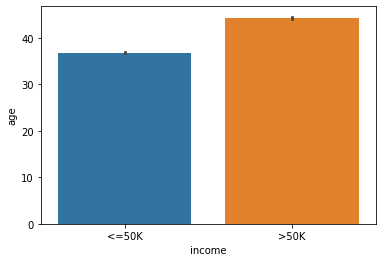

In [0]:
sns.barplot(x='income', y='age', data=pandas_df)
plt.show()

Out[55]: <AxesSubplot:xlabel='income', ylabel='education_num'>

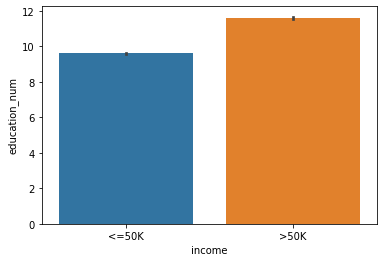

In [0]:
sns.barplot(x='income', y= 'education_num', data=pandas_df)

Out[56]: <AxesSubplot:ylabel='education'>

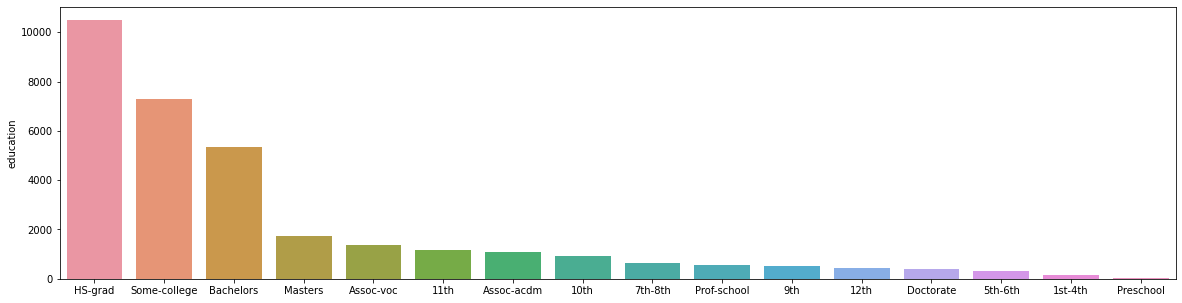

In [0]:
plt.figure(figsize=(20,5))
sns.barplot(x=pandas_df['education'].value_counts().index, y= pandas_df['education'].value_counts())

Out[57]: <AxesSubplot:ylabel='workclass'>

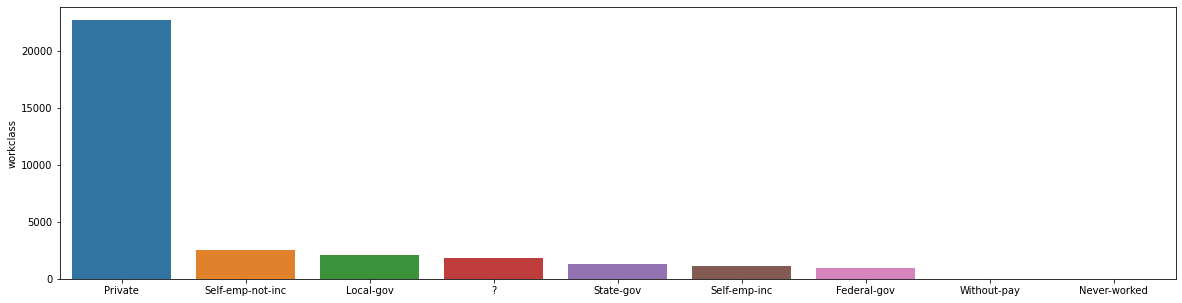

In [0]:
plt.figure(figsize=(20,5))
sns.barplot(x=pandas_df['workclass'].value_counts().index, y= pandas_df['workclass'].value_counts())

Out[58]: <AxesSubplot:ylabel='occupation'>

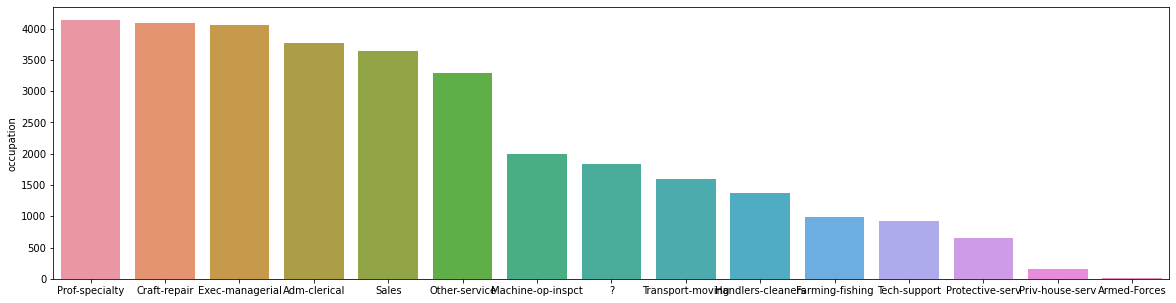

In [0]:
plt.figure(figsize=(20,5))
sns.barplot(x=pandas_df['occupation'].value_counts().index, y= pandas_df['occupation'].value_counts())

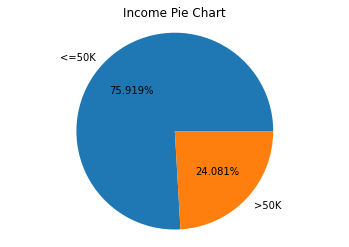

In [0]:
plt.pie(pandas_df['income'].value_counts(), labels=pandas_df['income'].value_counts().index, autopct='%1.3f%%')
plt.title("Income Pie Chart")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

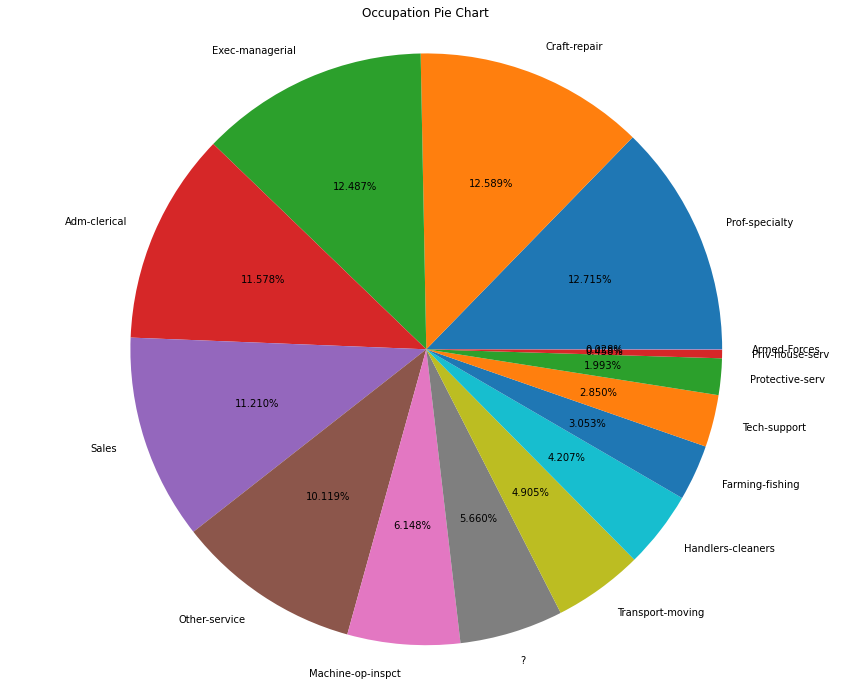

In [0]:
plt.figure(figsize=(15,12))
plt.pie(pandas_df['occupation'].value_counts(), labels=pandas_df['occupation'].value_counts().index, autopct='%1.3f%%')
plt.title("Occupation Pie Chart")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [0]:
import mlflow
import mlflow.spark
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
input_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

# Create the StringIndexer
indexer = StringIndexer(inputCols=input_cols, outputCols=[f"{col}_index" for col in input_cols])

# Fit and transform the DataFrame
indexer_model = indexer.fit(df)
indexed_df = indexer_model.transform(df)

# Drop the original categorical columns
for col_name in input_cols:
    indexed_df = indexed_df.drop(col_name)

# Rename the indexed columns to match the original column names
for col_name in input_cols:
    indexed_df = indexed_df.withColumnRenamed(f"{col_name}_index", col_name)

In [0]:
indexed_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- fnlwgt: integer (nullable = true)
 |-- education_num: integer (nullable = true)
 |-- capital_gain: integer (nullable = true)
 |-- capital_loss: integer (nullable = true)
 |-- hours_per_week: integer (nullable = true)
 |-- workclass: double (nullable = false)
 |-- education: double (nullable = false)
 |-- marital_status: double (nullable = false)
 |-- occupation: double (nullable = false)
 |-- relationship: double (nullable = false)
 |-- race: double (nullable = false)
 |-- sex: double (nullable = false)
 |-- native_country: double (nullable = false)
 |-- income: double (nullable = false)



In [0]:
#.chiSqTest()

In [0]:
features = ["age", "fnlwgt", "education_num", "capital_gain", "capital_loss", "hours_per_week", "workclass", "education", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
target = 'income'

In [0]:
vector_assembler = VectorAssembler(inputCols=features, outputCol="features")
indexed_df = vector_assembler.transform(indexed_df)

In [0]:
type(target)

Out[76]: str

In [0]:
type(features)

Out[79]: list

In [0]:
# Split the data into training and testing sets
train_data, test_data = indexed_df.randomSplit([0.7, 0.3], seed=42)

# Define the model
model = LogisticRegression(featuresCol='features', labelCol=target)

# Start the MLflow experiment
with mlflow.start_run():

    # Train the model
    trained_model = model.fit(train_data)

    # Log the model
    mlflow.spark.log_model(trained_model, "logistic_regression_model")

    # Make predictions on the testing data
    predictions = trained_model.transform(test_data)

    # Evaluate the model
    evaluator = MulticlassClassificationEvaluator(labelCol=target, metricName="accuracy")
    accuracy = evaluator.evaluate(predictions)

    # Log the evaluation metrics
    mlflow.log_metric("accuracy", accuracy)

2023/09/30 19:58:43 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().
/databricks/python/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
